# Image processing Project 2: Illumination correction and image usion

Ariel halfon

Daniel Nachum Hadad

In [156]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import numpy as np
from numpy import shape
from numpy.fft import fft2, ifft2

import skimage
from skimage import img_as_float
from skimage.filters import window,butterworth,gaussian,threshold_otsu
# from skimage.filters.rank import otsu
# from skimage.morphology import disk, ball

import scipy
from scipy.ndimage import rotate
from scipy import fftpack
from scipy.signal import convolve2d as conv2

from PIL import Image

import cv2

import math

# part 1 :
Illumination Correction of Retinal Images Using Superimpose Low Pass and 
Gaussian Filtering


Low Pass Filter - background correction

In [319]:
def LPF(img,cf=10):

  if cf%2 != 0:
    X=np.linspace(-cf,cf,cf*2+1,endpoint=True,dtype=int)
    Y=np.linspace(-cf,cf,cf*2+1,endpoint=True,dtype=int)
  else:
    X=np.linspace(-cf,cf,cf*2,endpoint=True,dtype=int)
    Y=np.linspace(-cf,cf,cf*2,endpoint=True,dtype=int)
 
  # x,y=np.shape(img)
  max_vl=0
  for i in range(2*cf):
    if np.sqrt((X[i])**2+(Y[i])**2) <= cf:
      max_vl=i
      break

  print('the size of the kernel is ['+str(max_vl)+','+str(max_vl)+']')
  psf = np.ones((max_vl, max_vl)) / cf
  # filter=(1/cf)*np.ones((max_vl,max_vl),dtype=float)
  print(psf)
  lpf_img=conv2(img,psf,'same')

  return lpf_img


In [309]:
def gaussian_filter(img,sigma=0.5,window_sz=50):
    kernel=np.zeros((window_sz,window_sz))
    for i in range(window_sz):
        for j in range(window_sz):
            kernel[i,j]=np.exp(-(i**2+j**2)/(2*(sigma)**2))*1/(2*np.pi*(sigma)**2)


    img_guass=conv2(img,kernel,'same',boundary='wrap' )
    # img_fix=np.resize(img_guass,np.shape(img))

    return img_guass



In [614]:
def display_images(img,lpf,gauss,p):
    otsu_img=threshold_otsu(img)
    binary = img >= otsu_img

    fig, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(50, 50))

    ax1.set_title("Original",fontsize=40)
    ax1.imshow(img, cmap=plt.cm.Greys_r)

    ax2.set_title("LPF",fontsize=40)
    ax2.imshow(lpf,cmap='gray')

    ax3.set_title('Gaussian window',fontsize=40)
    ax3.imshow(gauss,cmap='gray')

    ax4.set_title('Fix image',fontsize=40)
    ax4.imshow(p,cmap='gray')

    ax5.set_title('Otsu',fontsize=40)
    ax5.imshow(binary,cmap='gray')

    ax6.set_title('Otsu+Fix_img',fontsize=40)
    ax6.imshow(abs(p+binary),cmap='gray')
    # ax6.imshow(conv2(p,binary,'same'),cmap='gray')

In [302]:
# sample=np.array(Image.open('sample.png').convert('L'))
# imshow(sample,cmap='gray')

the size of the kernel is [3,3]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


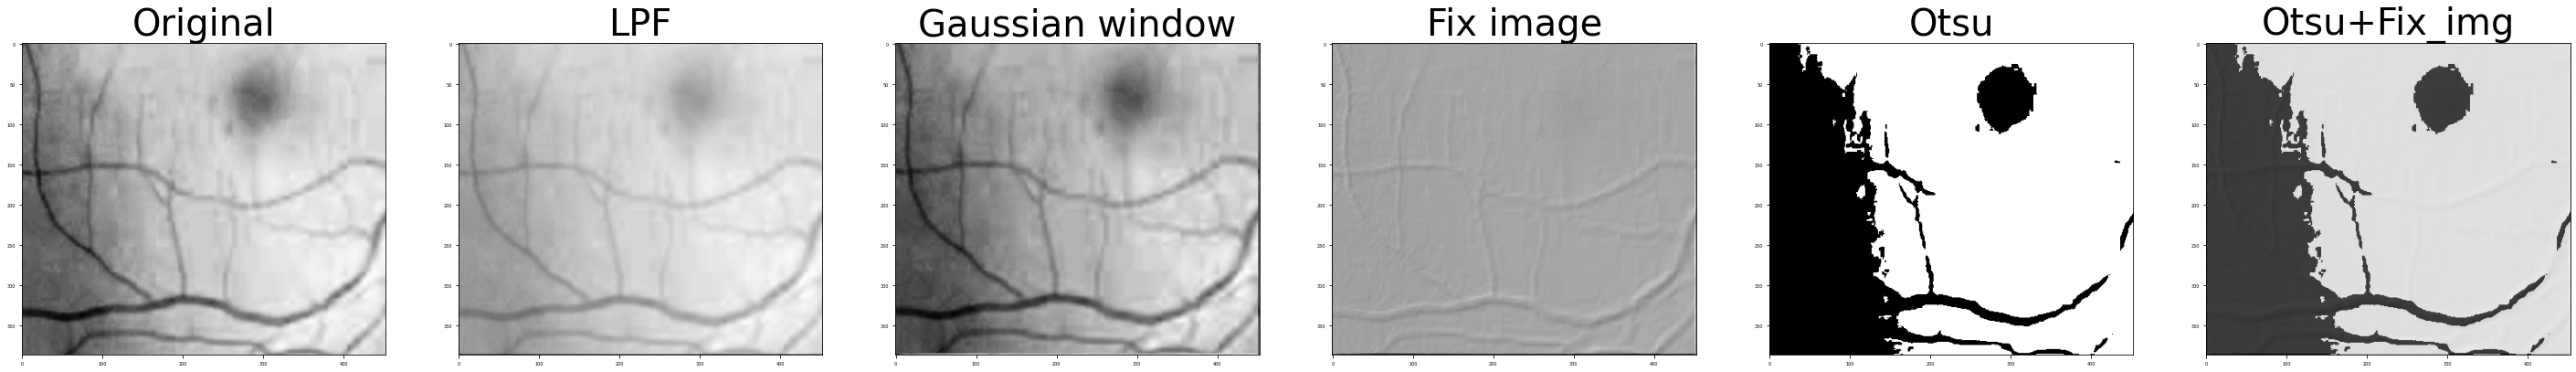

In [615]:
sample=np.array(Image.open('sample1.png').convert('L'))

sample=sample/np.max(sample)
cf=10
sample_lpf=LPF(np.double(sample),cf)

# sample_lpf=butterworth(np.double(sample),cf,False)
sample_w_guass=gaussian_filter(sample,0.5,5)

# P(x,y) = img_lpf - wimage_guass + mean_img
p_sample=sample_lpf-sample_w_guass+np.mean(sample_w_guass)

sample_otsu=threshold_otsu(sample)

# print(sample_otsu)
display_images(sample,sample_lpf,sample_w_guass,p_sample)

the size of the kernel is [3,3]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


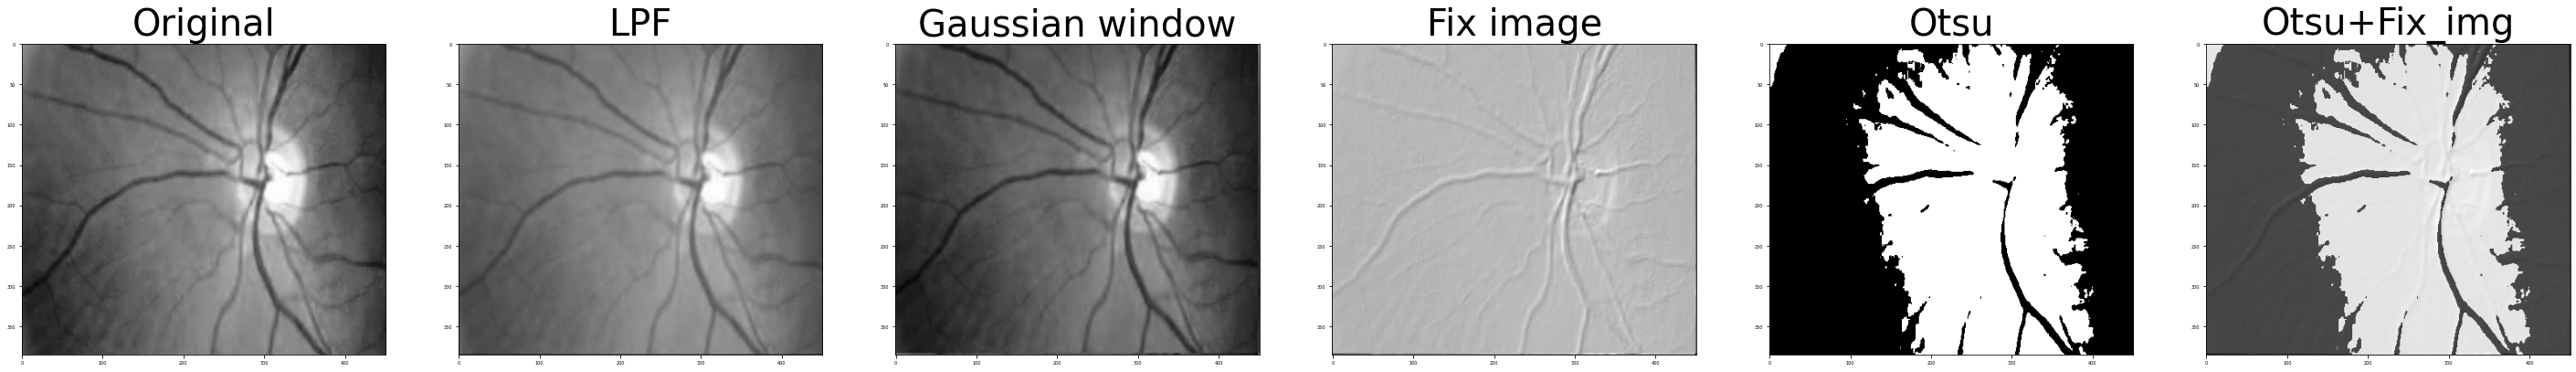

In [616]:
sample2=np.array(Image.open('sample2.png').convert('L'))

sample2=sample2/np.max(sample2)
cf=10
sample2_lpf=LPF(np.double(sample2),cf)

# sample_lpf=butterworth(np.double(sample),1/cf,False)
sample2_w_guass=gaussian_filter(sample2,0.5,5)

# P(x,y) = img_lpf - wimage_guass + mean_img
p_sample2=sample2_lpf-sample2_w_guass+np.mean(sample2_w_guass)

display_images(sample2,sample2_lpf,sample2_w_guass,p_sample2)

the size of the kernel is [3,3]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


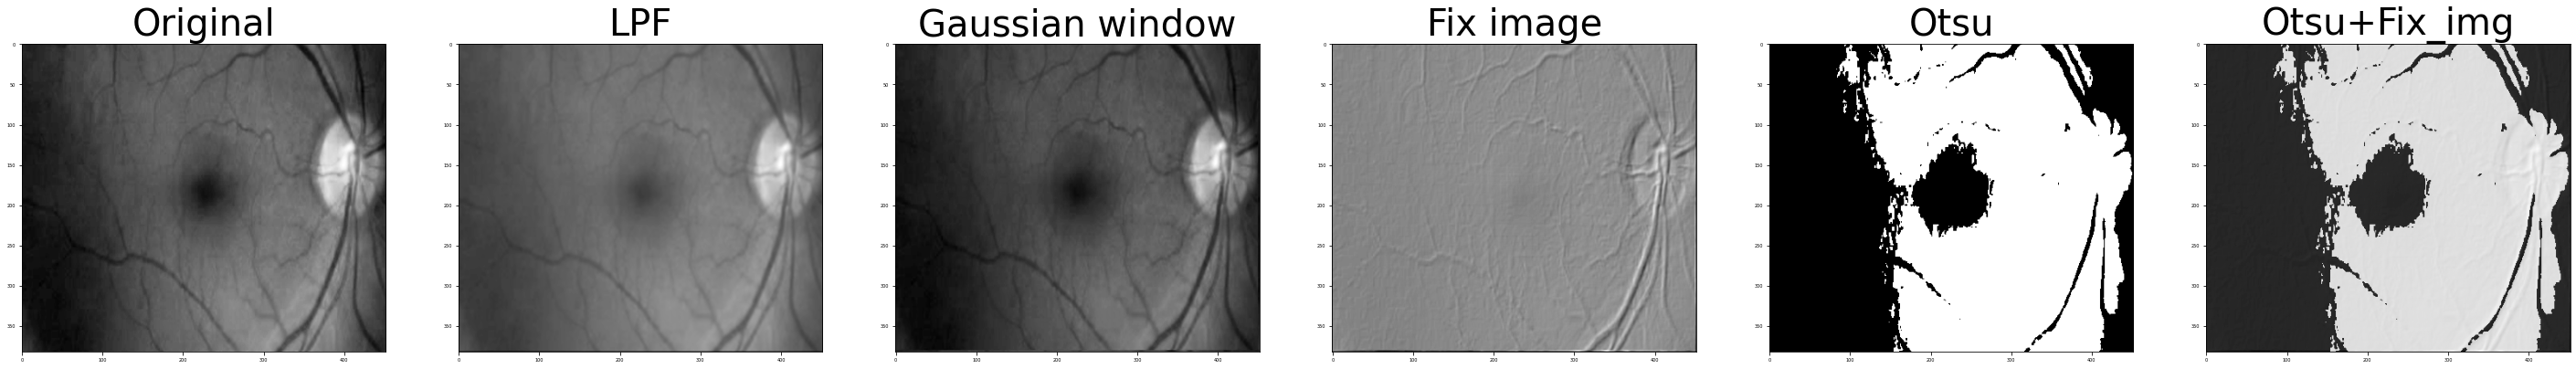

In [617]:
sample3=np.array(Image.open('sample3.png').convert('L'))

sample3=sample3/np.max(sample3)
cf=10
sample3_lpf=LPF(np.double(sample3),cf)

# sample_lpf=butterworth(np.double(sample),1/cf,False)
sample3_w_guass=gaussian_filter(sample3,0.5,5)

# P(x,y) = img_lpf - wimage_guass + mean_img
p_sample3=sample3_lpf-sample3_w_guass+np.mean(sample3_w_guass)

display_images(sample3,sample3_lpf,sample3_w_guass,p_sample3)

the size of the kernel is [6,6]
[[0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05]]


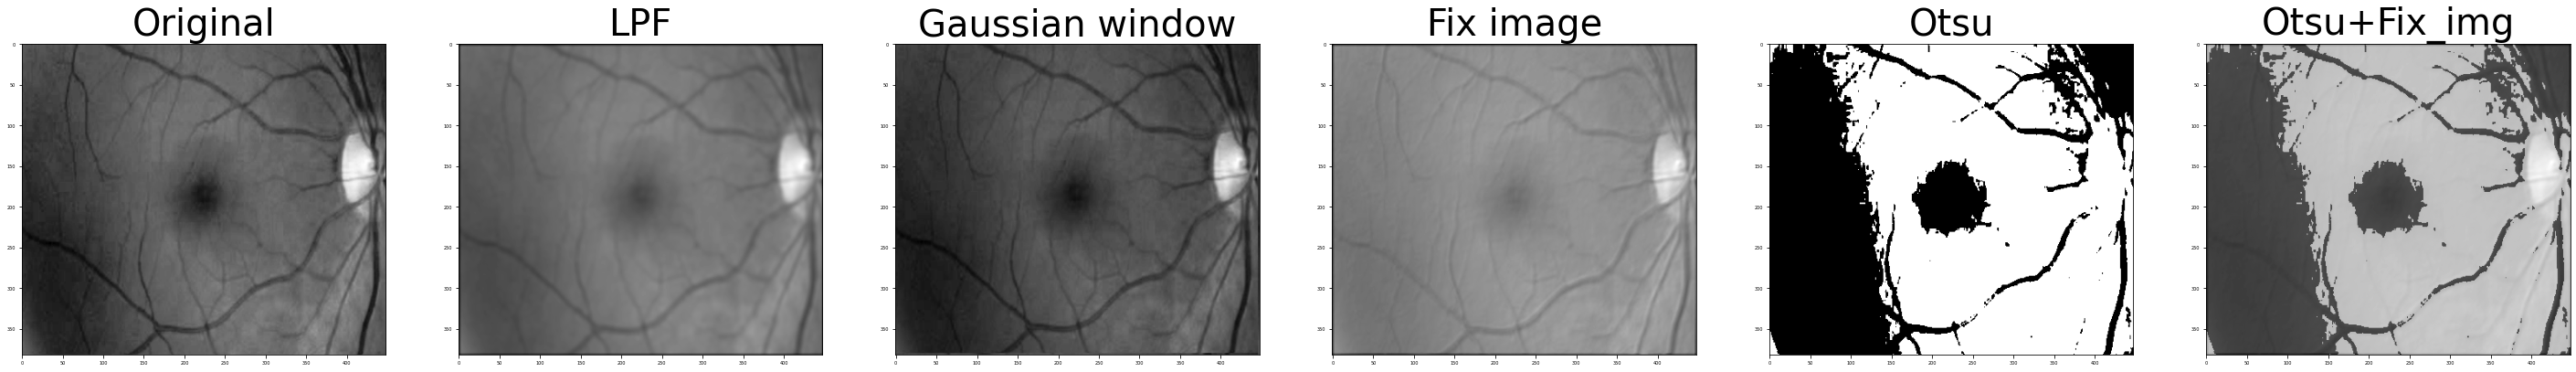

In [618]:
sample4=np.array(Image.open('sample4.png').convert('L'))

sample4=sample4/np.max(sample4)
cf=20
sample4_lpf=LPF(np.double(sample4),cf)

# sample_lpf=butterworth(np.double(sample),1/cf,False)
sample4_w_guass=gaussian_filter(sample4,0.5,5)

# P(x,y) = img_lpf - wimage_guass + mean_img
p_sample4=sample4_lpf-sample4_w_guass+np.mean(sample4_w_guass)

display_images(sample4,sample4_lpf,sample4_w_guass,p_sample4)

the size of the kernel is [3,3]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


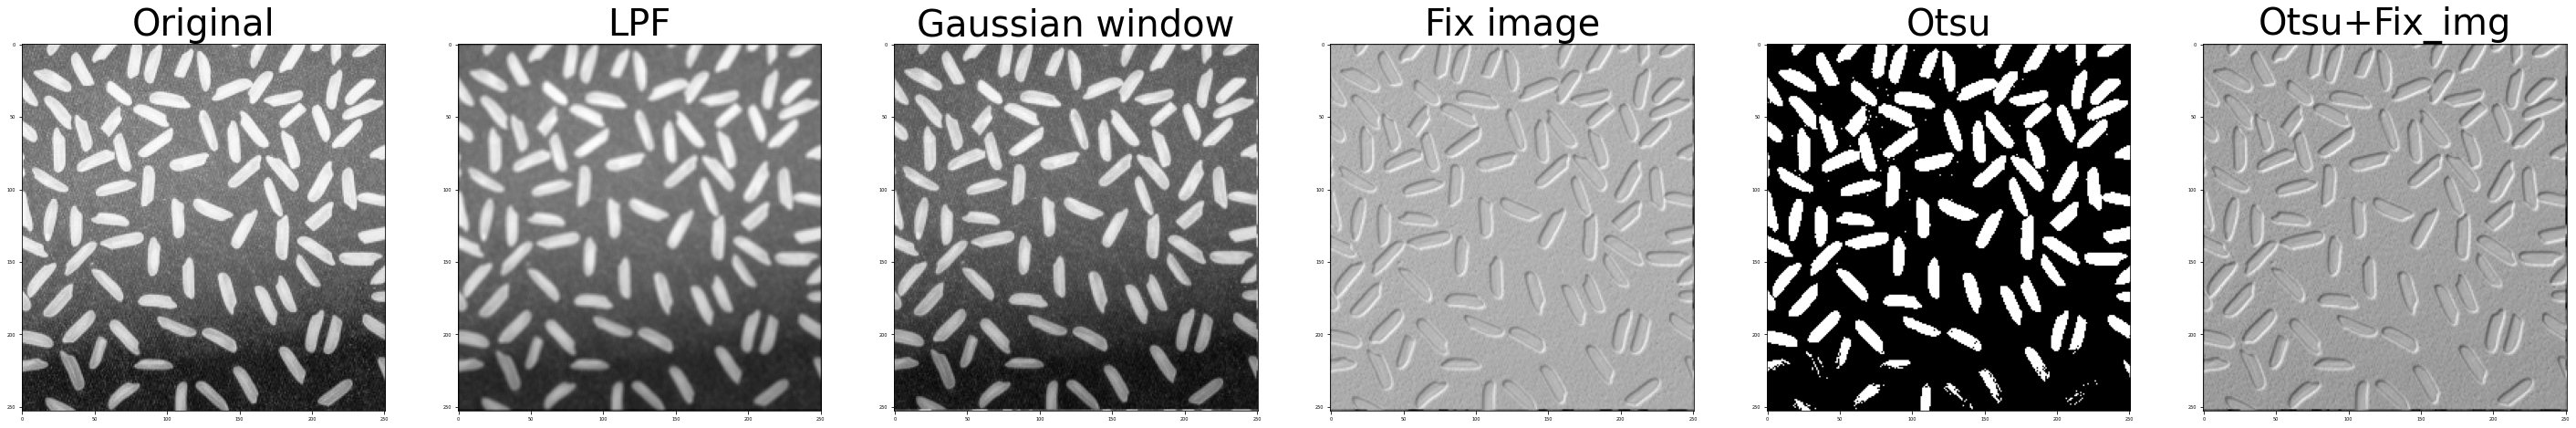

In [620]:
rice=np.array(Image.open('rice.jpg').convert('L'),dtype=float)
cf=10
rice_lpf=LPF(rice,cf)
rice_w_guass=gaussian_filter(rice,0.5,4)
# P(x,y) = img_lpf - wimage_guass + mean_img
p_rice=rice_lpf-rice_w_guass+np.mean(rice_w_guass)

display_images(rice,rice_lpf,rice_w_guass,p_rice)


the size of the kernel is [3,3]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


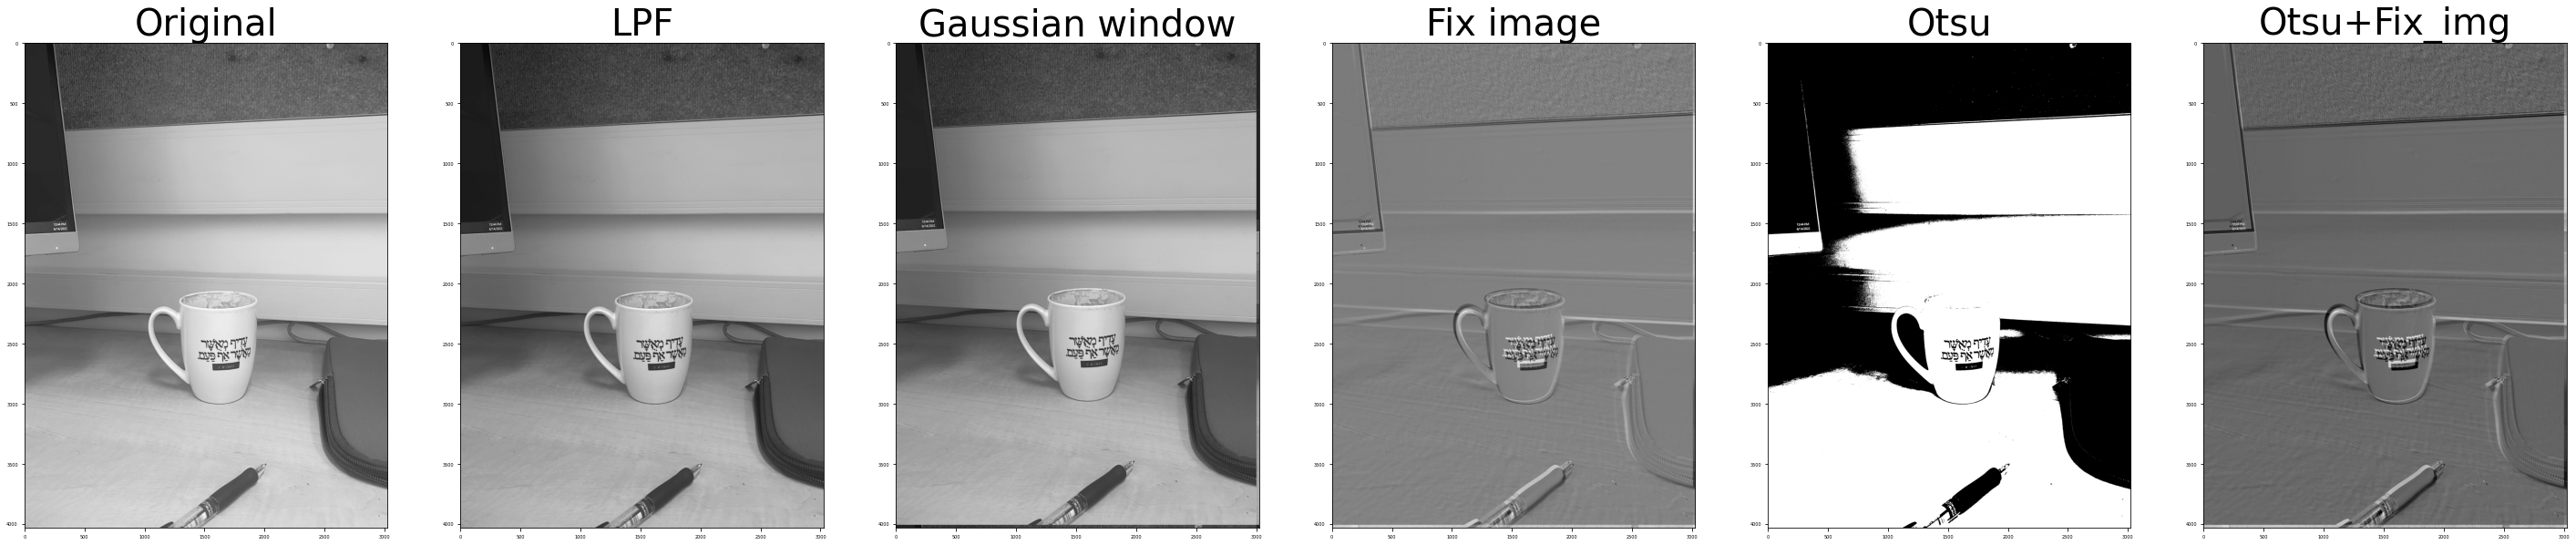

In [621]:
real_img=np.rot90(np.array(Image.open('IMG-7899.jpg').convert('L')),3)
# img1=cv2.resize(real_img, (128,128), interpolation = cv2.INTER_AREA)
cf=10

real_lpf=LPF(real_img,cf)
# real_lpf=butterworth(real_img,1/cf,False)
real_w_guass=gaussian_filter(real_img,0.5,50)


# P(x,y) = img_lpf - wimage_guass + mean_img

p_real=real_lpf-real_w_guass+np.mean(real_w_guass)

display_images(real_img,real_lpf,real_w_guass,p_real)




# part 2

In [536]:
#!pip install mdct
from scipy.fft import dctn,idctn,idct
from numpy import zeros

In [537]:
def display4imgs(I_LL,I_HL,I_LH,I_HH):    
    fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize = [10,10])
    
    axs[0,0].imshow(I_LL, cmap=plt.cm.Greys_r)
    axs[0,0].set_title("I_LL")

    axs[1,0].imshow(I_HL,cmap=plt.cm.Greys_r)
    axs[1,0].set_title("I_HL")

    axs[0,1].imshow(I_LH,cmap=plt.cm.Greys_r)
    axs[0,1].set_title('I_LH ')

    axs[1,1].imshow(I_HH,cmap=plt.cm.Greys_r)
    axs[1,1].set_title('I_HH')

In [538]:
def mdct(img):

    i=dctn(img)

    #find the size of the image
    i=dctn(img)
    length_i=int(len(i))

    #along the coulums
    I_L=idctn(i[0:int((length_i/2)),:])
    I_H=idctn(i[int(length_i/2):length_i,:])

    # dct to I_L and I_H
    i_l=dctn(I_L)
    i_h=dctn(I_H)


    #left top
    I_LL= idctn(i_l[:,0:(int(len(i_l)/2))])

    #left bottom
    I_HL= idctn(i_h[:,0:(int(len(i_h)/2))])

    # right top
    I_LH=idctn(i_l[:,int(len(i_l)/2):int(len(i_l))])

    # right bottom
    I_HH=idctn(i_h[:,int(len(i_h)/2):int(len(i_h))])



    return I_LL,I_HL,I_LH,I_HH


In [563]:
def decomposition_img(I1_LL,I1_HL,I1_LH,I1_HH,I2_LL,I2_HL,I2_LH,I2_HH):
    LL=(I1_LL+I2_LL)/2

    # LL_d=(I1_LL_d+I2_LL_d)/2
    # print(abs(np.max(I1_HL_d)),abs(np.max(I1_HL)))
    # print(abs(np.max(I2_HL_d)),abs(np.max(I2_HL)))

    if abs(np.max(I1_HL))>=abs(np.max(I2_HL)):
        HL=I1_HL

        # HL_d=I1_HL_d
    else:
        HL=I2_HL
        # HL_d=I2_HL_d

    # print(abs(np.max(I1_LH_d)),abs(np.max(I1_LH)))
    # print(abs(np.max(I2_LH_d)),abs(np.max(I2_LH)))

    if abs(np.max(I1_LH))>=abs(np.max(I2_LH)):
        LH=I1_LH
        # LH_d=I1_LH_d
    else:
        LH=I2_LH
        # LH_d=I2_LH_d

    if abs(np.max(I1_HH))>=abs(np.max(I2_HH)):
        HH=I1_HH
        # HH_d=I1_HH_d
    else:
        HH=I2_HH
        # HH_d=I2_HH_d  
    return LL,HL,LH,HH  


In [539]:
plane1=np.double(np.array(Image.open('plane1.png').convert('L')))
plane2=np.double(np.array(Image.open('plane2.png').convert('L')))

plane1=cv2.resize(plane1, (1000,1000), interpolation = cv2.INTER_AREA)
plane2=cv2.resize(plane2, (1000,1000), interpolation = cv2.INTER_AREA)

In [497]:
I1_LL,I1_HL,I1_LH,I1_HH=mdct(plane1)
I2_LL,I2_HL,I2_LH,I2_HH=mdct(plane2)

I1_LL_d,I1_HL_d,I1_LH_d,I1_HH_d=mdct(I1_LL)
I2_LL_d,I2_HL_d,I2_LH_d,I2_HH_d=mdct(I2_LL)


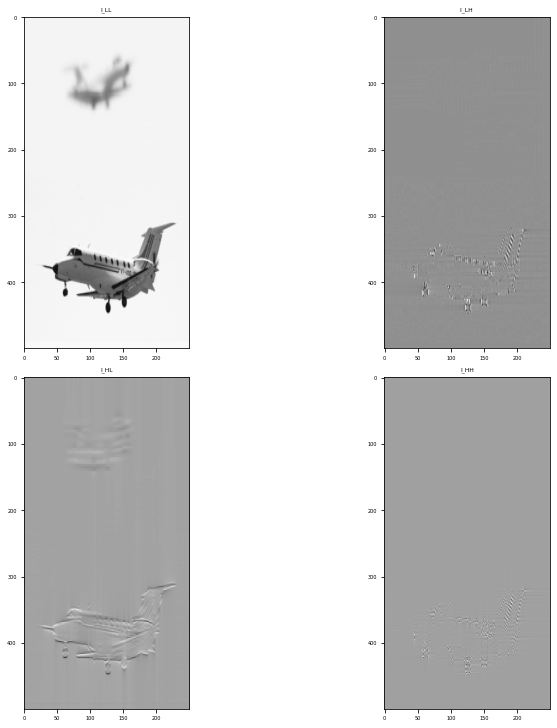

In [624]:

display4imgs(I1_LL,I1_HL,I1_LH,I1_HH)  # size of each image is : [500,250]
# display4imgs(I1_LL_d,I1_HL_d,I1_LH_d,I1_HH_d) # size of each image is :[250,125]

combine each image to one image 

In [507]:
plane1_decomposition1=np.block([[I1_LL_d,I1_HL_d],[I1_LH_d,I1_HH_d]]) #[100,50]

plane2_decomposition1=np.block([[I2_LL_d,I2_HL_d],[I2_LH_d,I2_HH_d]]) #[100,50]


plane1_combine=np.block([[plane1_decomposition1,I1_HL],[I1_LH,I1_HH]])

plane2_combine=np.block([[plane2_decomposition1,I2_HL],[I2_LH,I2_HH]])

# imshow(plane2_decomposition1,cmap=plt.cm.Greys_r)
# imshow(plane2_combine,cmap='gray')

In [520]:
LL=(I1_LL+I2_LL)/2
LL_d=(I1_LL_d+I2_LL_d)/2
print(abs(np.max(I1_HL_d)),abs(np.max(I1_HL)))
print(abs(np.max(I2_HL_d)),abs(np.max(I2_HL)))

if abs(np.max(I1_HL_d))>=abs(np.max(I2_HL_d)):
    HL=I1_HL
    HL_d=I1_HL_d
else:
    HL=I2_HL
    HL_d=I2_HL_d
    

1331.082565057397 355.6325234393466
1268.8037776332862 325.70552590933215


In [561]:
def decomposition_img(I1_LL,I2_LL,I1_HL,I2_HL,I1_LH,I2_LH,I1_HH,I2_HH):
    LL=(I1_LL+I2_LL)/2

    # LL_d=(I1_LL_d+I2_LL_d)/2
    # print(abs(np.max(I1_HL_d)),abs(np.max(I1_HL)))
    # print(abs(np.max(I2_HL_d)),abs(np.max(I2_HL)))

    if abs(np.max(I1_HL))>=abs(np.max(I2_HL)):
        HL=I1_HL

        # HL_d=I1_HL_d
    else:
        HL=I2_HL
        # HL_d=I2_HL_d

    # print(abs(np.max(I1_LH_d)),abs(np.max(I1_LH)))
    # print(abs(np.max(I2_LH_d)),abs(np.max(I2_LH)))

    if abs(np.max(I1_LH))>=abs(np.max(I2_LH)):
        LH=I1_LH
        # LH_d=I1_LH_d
    else:
        LH=I2_LH
        # LH_d=I2_LH_d

    if abs(np.max(I1_HH))>=abs(np.max(I2_HH)):
        HH=I1_HH
        # HH_d=I1_HH_d
    else:
        HH=I2_HH
        # HH_d=I2_HH_d  
    return LL,HL,LH,HH  




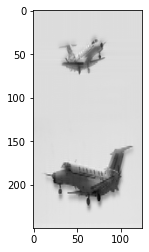

In [522]:

# imshow(LL+LH+HL+HH,cmap='gray')

# imshow(LL_d+LH_d+HL_d+HH_d,cmap='gray')

In [516]:
print(abs(np.max(I1_HH_d)),abs(np.max(I1_HH)))
print(abs(np.max(I2_HH_d)),abs(np.max(I2_HH)))

322.7854088423079 48.76392961717296
362.15629419712565 62.153957998148925


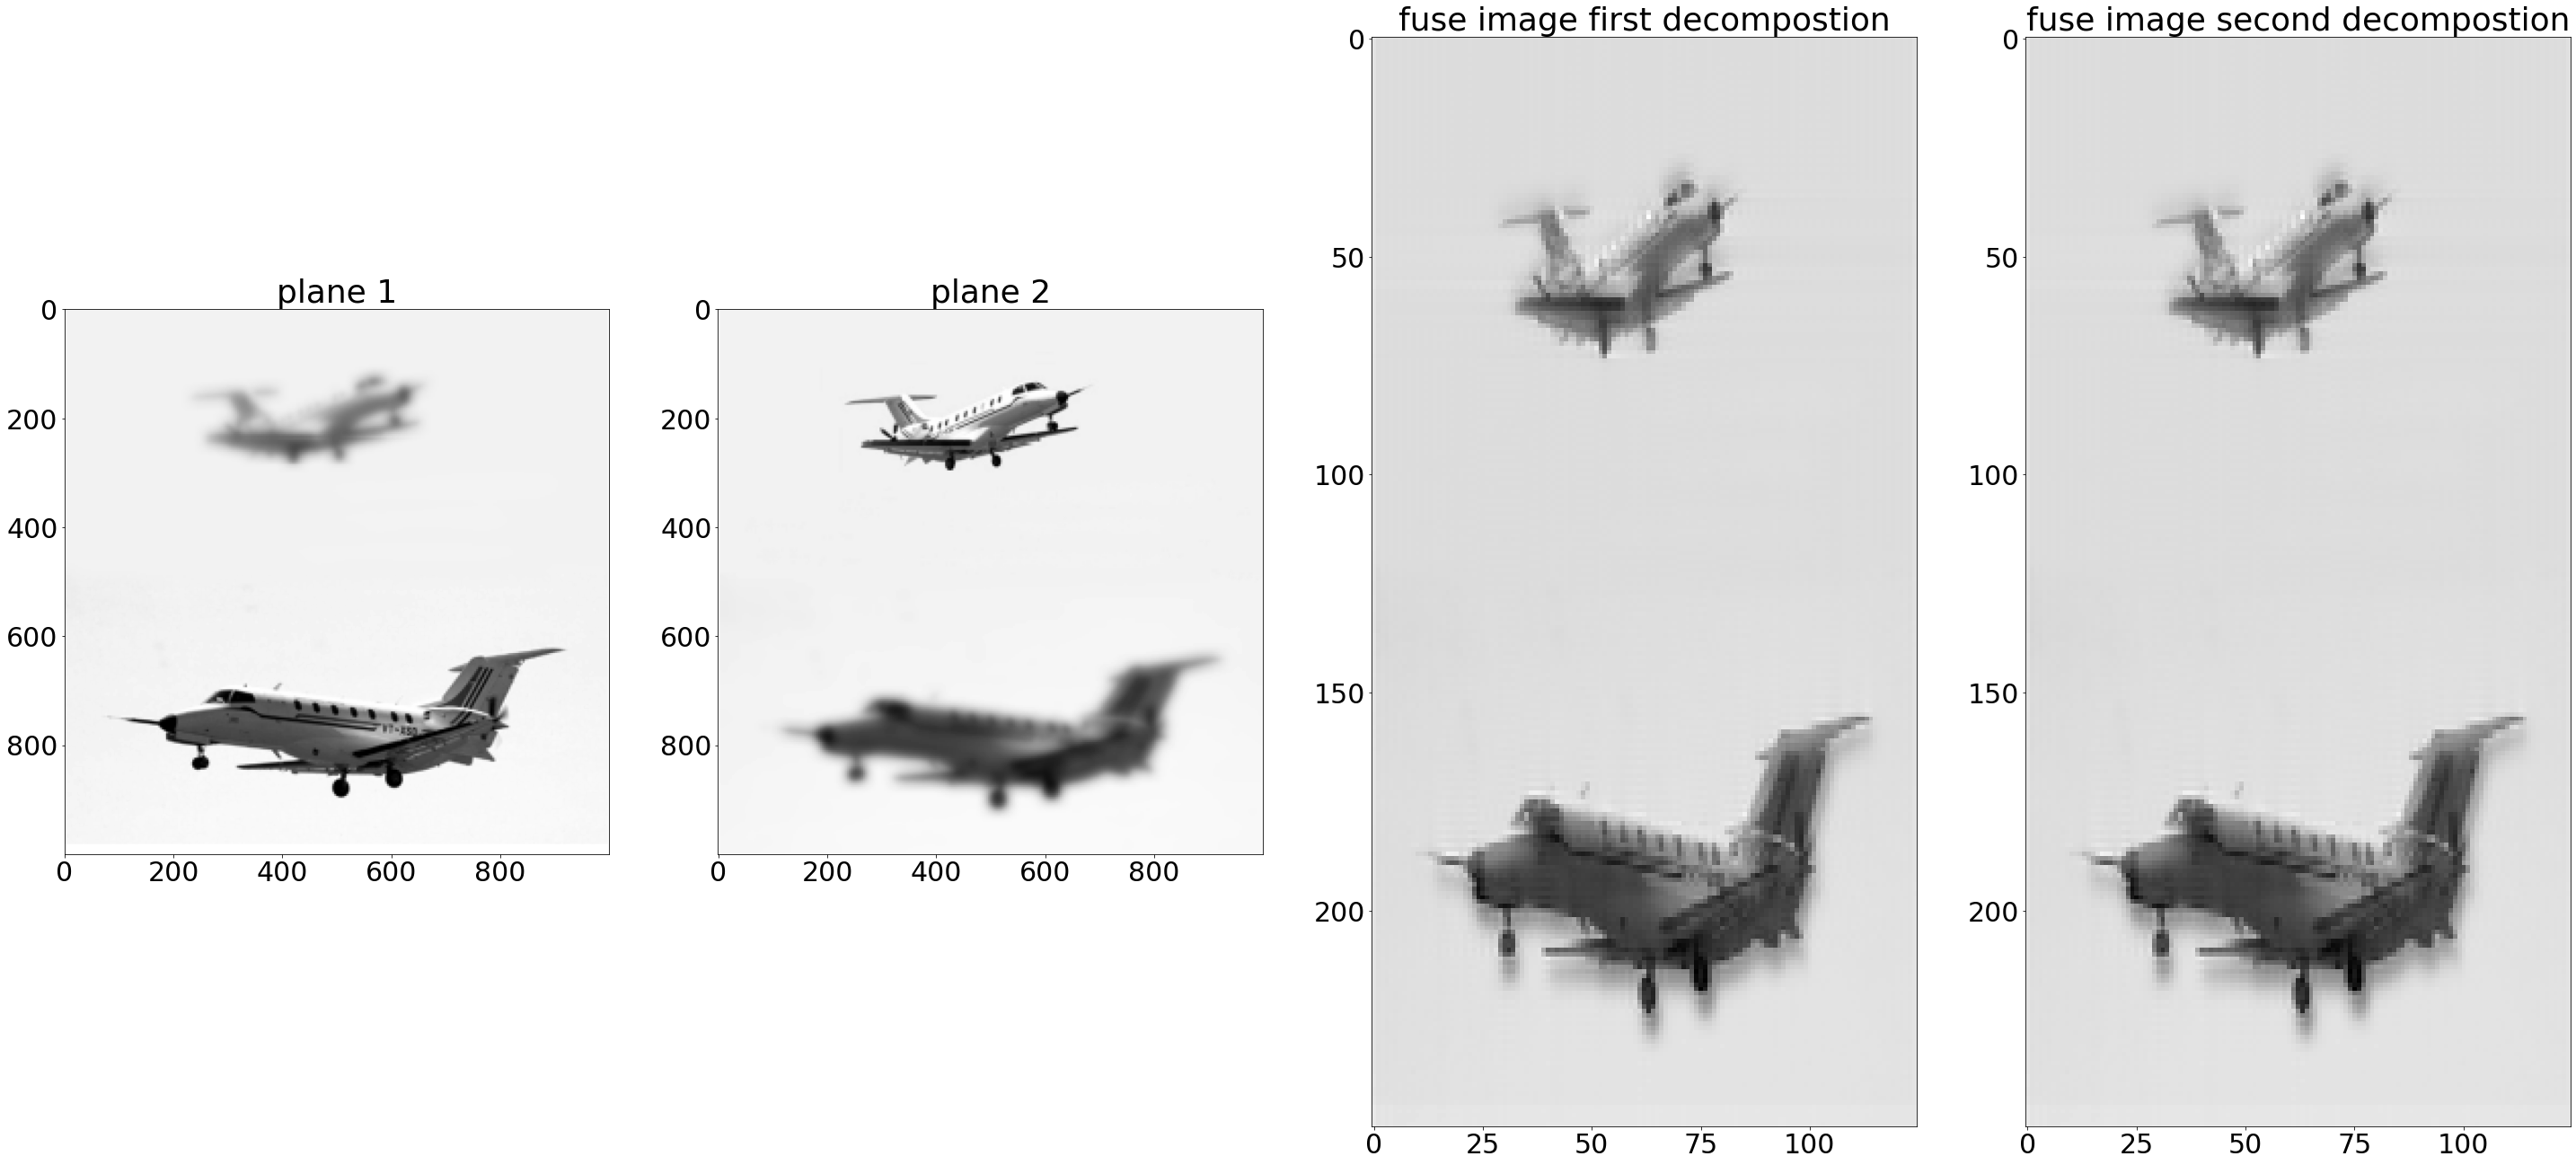

In [560]:
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(50, 50))

    ax1.set_title("plane 1")

    ax1.imshow(plane1,cmap='gray')


    ax2.set_title("plane 2")
    ax2.imshow(plane2,cmap='gray')

    ax3.set_title('fuse image first decomposition')
    ax3.imshow(LL_d+LH_d+HL_d+HH_d,cmap='gray')

    ax4.set_title('fuse image second decomposition')
    ax4.imshow(LL_d+LH_d+HL_d+HH_d,cmap='gray')



real images

In [586]:
img1=np.double(np.array(Image.open('img1.jpeg').convert('L')))
img2=np.double(np.array(Image.open('img2.jpeg').convert('L')))

# img1=cv2.resize(img1, (400,400), interpolation = cv2.INTER_AREA)
# img2=cv2.resize(img2, (400,400), interpolation = cv2.INTER_AREA)

In [587]:
Im1_LL,Im1_HL,Im1_LH,Im1_HH=mdct(img1)
Im2_LL,Im2_HL,Im2_LH,Im2_HH=mdct(img2)

Im1_LL_d,Im1_HL_d,Im1_LH_d,Im1_HH_d=mdct(Im1_LL)
Im2_LL_d,Im2_HL_d,Im2_LH_d,Im2_HH_d=mdct(Im2_LL)

In [588]:
LL_img,HL_img,LH_img,HH_img=decomposition_img(Im1_LL,Im1_HL,Im1_LH,Im1_HH,
                            Im2_LL,Im2_HL,Im2_LH,Im2_HH)
LL_img_d,HL_img_d,LH_img_d,HH_img_d=decomposition_img(Im1_LL_d,Im1_HL_d,Im1_LH_d,Im1_HH_d,
                                    Im2_LL_d,Im2_HL_d,Im2_LH_d,Im2_HH_d)
                                                                


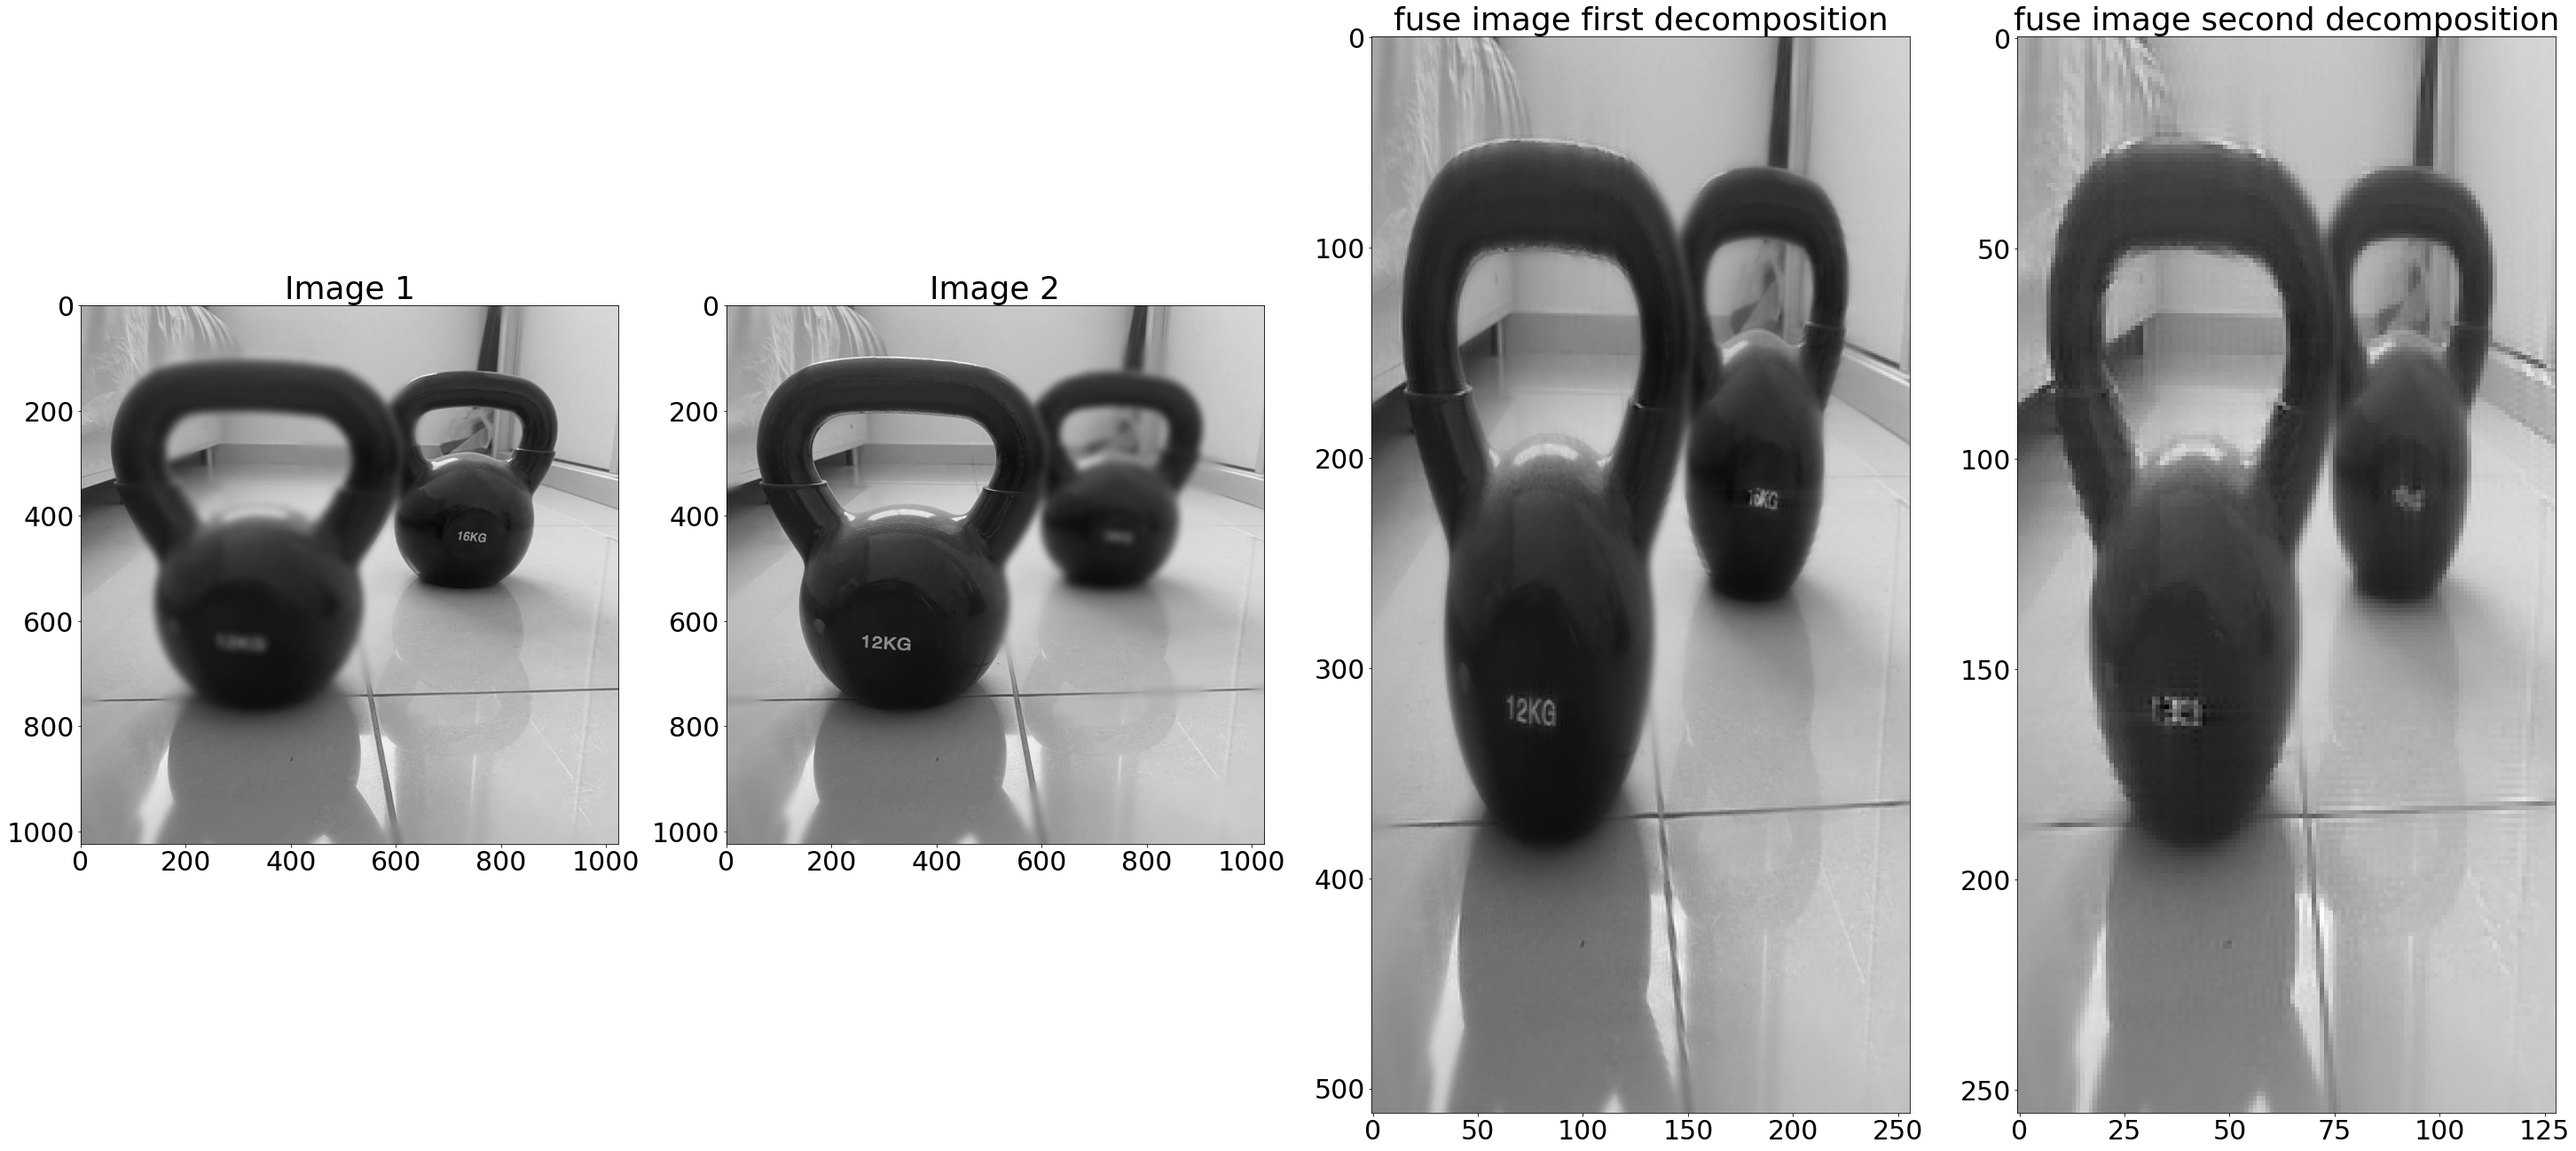

In [589]:
    # fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(50, 50))

    # ax1.set_title("Image 1")

    # ax1.imshow(img1,cmap='gray')


    # ax2.set_title("Image 2")
    # ax2.imshow(img2,cmap='gray')

    # ax3.set_title('fuse image first decomposition')
    # ax3.imshow(LL_img+HL_img+LH_img+HH_img,cmap='gray')

    # ax4.set_title('fuse image second decomposition')
    # ax4.imshow(LL_img_d+HL_img_d+LH_img_d+HH_img_d,cmap='gray')


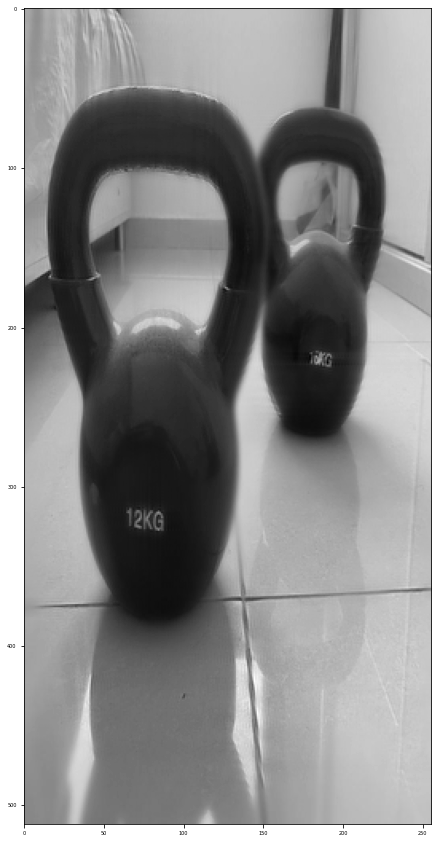

In [598]:
plt.subplots(1, 1, figsize=(15, 15))
fontsize=15
imshow(LL_img+HL_img+LH_img+HH_img,cmap='gray')

# plt.rcParams.update({'font.size': 5})

Application of the articles:
[1] “Illumination Correction of Retinal Images Using Superimpose Low Pass and Gaussian Filtering”; Wan Azani Mustafa , , Haniza Yazid,Manasij , Sazali Bin Yaacob; Published: March 2015 International Conference on Biomedical Engineering, 30-31

[2] ” Discrete Cosine Transform-based Image Fusion”; V.P.S. Naidu, January 2010, Defence Science Journal, Vol. 60, No. 1, January 2010, pp. 48-54 DESIDOC